In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output

### Step1: Import data set

In [43]:
banknifty = pd.read_csv("banknifty.csv",parse_dates=['date','time'])
nifty50 = pd.read_csv("nifty50.csv",parse_dates=['date','time'])
nifty50.head()

,index,date,time,open,high,low,close
0,NIFTY,2013-04-01,2018-12-11 09:16:00,5701.15,5704.65,5694.30,5697.00
1,NIFTY,2013-04-01,2018-12-11 09:17:00,5697.05,5698.35,5695.65,5697.50
2,NIFTY,2013-04-01,2018-12-11 09:18:00,5697.90,5697.90,5690.60,5692.15
3,NIFTY,2013-04-01,2018-12-11 09:19:00,5691.65,5694.70,5691.65,5693.90
4,NIFTY,2013-04-01,2018-12-11 09:20:00,5694.40,5695.05,5693.35,5694.55


In [44]:
banknifty.head()

,index,date,time,open,high,low,close
0,BANKNIFTY,2012-12-03,2018-12-11 09:16:00,12125.70,12161.70,12125.70,12160.95
1,BANKNIFTY,2012-12-03,2018-12-11 09:17:00,12161.75,12164.80,12130.40,12130.40
2,BANKNIFTY,2012-12-03,2018-12-11 09:18:00,12126.85,12156.10,12126.85,12156.10
3,BANKNIFTY,2012-12-03,2018-12-11 09:19:00,12157.25,12164.75,12151.60,12164.20
4,BANKNIFTY,2012-12-03,2018-12-11 09:20:00,12162.80,12162.80,12148.20,12151.15


In [45]:
banknifty = banknifty.drop(['index'],axis=1)
nifty50 = nifty50.drop(['index'],axis=1)

#### Basic Statistics

In [46]:
nifty50.describe()

,open,high,low,close
count,352920.000000,352920.000000,352920.000000,352920.000000
mean,7374.515649,7376.077510,7372.936147,7374.498883
std,1070.893139,1071.032665,1070.756739,1070.885970
min,5126.150000,5127.250000,5118.850000,5126.300000
25%,6167.650000,6168.900000,6166.550000,6167.700000
50%,7738.800000,7740.150000,7737.450000,7738.800000
75%,8298.762500,8300.900000,8297.050000,8298.750000
max,9115.400000,9119.200000,9105.650000,9106.500000


#### Get the data when nifty price is high

In [47]:
nifty50.loc[nifty50['high']==9119.2]

,date,time,open,high,low,close
240137,2015-03-04,2018-12-11 09:16:00,9115.4,9119.2,9105.65,9106.5


In [48]:
nifty50.loc[nifty50['high']==5127.25]

,date,time,open,high,low,close
13949,2013-08-28,2018-12-11 10:40:00,5127.25,5127.25,5122.7,5126.3


#### Nifty 50 plot time series plot

In [50]:
nifty50_mean = nifty50.groupby('date').mean()
nifty50_mean.head()

,open,high,low,close
date,,,,
2013-01-01,5950.678267,5951.491067,5949.986667,5950.689733
2013-01-02,5995.653733,5996.420267,5994.909200,5995.663733
2013-01-03,6003.101600,6003.903733,6002.381333,6003.124267
2013-01-04,5994.905733,5995.648667,5994.187467,5994.906800
2013-01-07,6011.653067,6012.265200,6010.813600,6011.506400


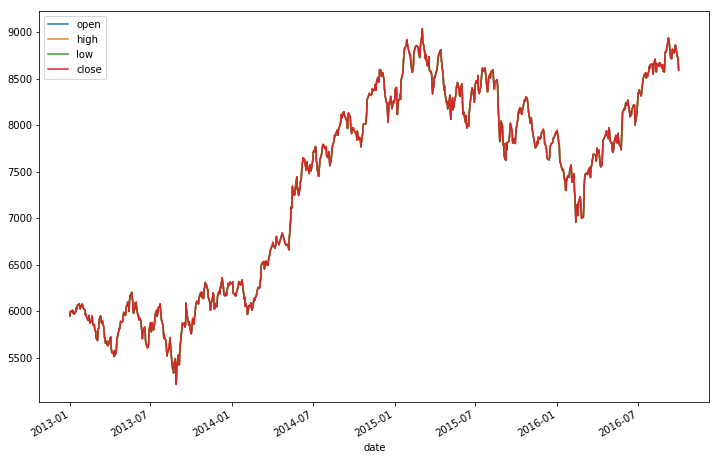

In [9]:
nifty50_mean.plot(figsize=(12,8))

In [10]:
banknifty.describe()

,open,high,low,close
count,367575.000000,367575.000000,367575.000000,367575.000000
mean,15078.023296,15082.498465,15073.480983,15077.993028
std,3184.438089,3185.213591,3183.628315,3184.411825
min,1405.050000,1407.050000,1404.600000,1405.200000
25%,12092.200000,12095.000000,12089.150000,12092.175000
50%,15526.100000,15531.200000,15521.400000,15525.950000
75%,17956.050000,17960.550000,17951.100000,17955.800000
max,20903.950000,20907.550000,20899.250000,20907.550000


In [11]:
banknifty.loc[banknifty['high']==20907.550]

,date,time,open,high,low,close
236193,2015-01-28,2018-12-11 12:35:00,20902.15,20907.55,20894.35,20907.55


In [12]:
banknifty.loc[banknifty['high']==1407.050]

,date,time,open,high,low,close
252479,2015-06-24,2018-12-11 15:19:00,1405.05,1407.05,1404.6,1406.25


In [13]:
banknifty_mean = banknifty.groupby('date').mean()
banknifty_mean.head()

,open,high,low,close
date,,,,
2012-11-01,11305.950533,11308.328400,11303.584000,11306.027600
2012-11-02,11429.929733,11432.193733,11427.817200,11429.955600
2012-11-05,11451.321867,11453.444667,11449.234667,11451.354533
2012-11-06,11494.561733,11496.849600,11492.694133,11494.892667
2012-11-07,11666.770800,11669.293467,11664.445067,11666.936533


#### Bank nifty plot time series plot

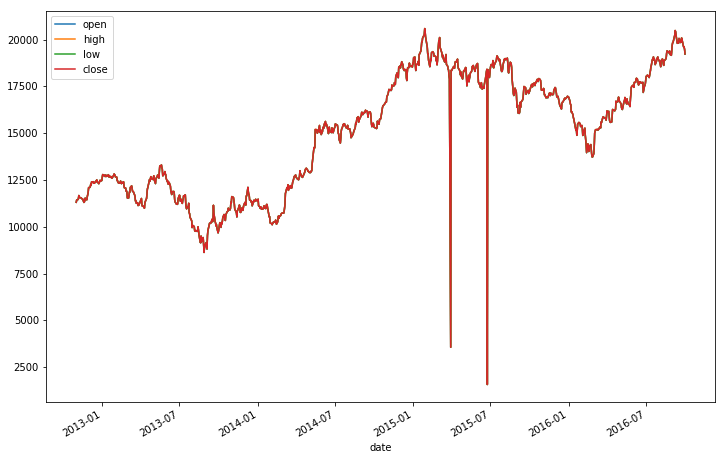

In [14]:
banknifty_mean.plot(figsize=(12,8))

#### Observation: 
There is 2 huge drop in year 2015. We will later on try to find the details of incident.

In [15]:
maximum_drop_nifty50 =  max(nifty50['open'] - nifty50['low'])
maximum_drop_nifty50

137.55000000000018

In [16]:
nifty50.loc[(nifty50['open'] - nifty50['low']) == maximum_drop_nifty50]

,date,time,open,high,low,close
162096,2014-05-30,2018-12-11 09:16:00,7256.0,7258.15,7118.45,7254.55


#### Observation: 
The day nifty50 dipped huge is 2014-05-30

In [17]:
maximum_up_nifty50 =  max(nifty50['high'] - nifty50['open'])
nifty50.loc[(nifty50['high'] - nifty50['open']) == maximum_up_nifty50]

,date,time,open,high,low,close
158346,2014-05-16,2018-12-11 09:16:00,7273.55,7433.2,7264.4,7417.65


#### Observation: 
The day nifty50 raised huge is 2014-05-16

In [18]:
maximum_drop_banknifty =  max(banknifty['open'] - banknifty['low'])
maximum_drop_banknifty

282.39999999999964

In [19]:
banknifty.loc[(banknifty['open'] - banknifty['low']) == maximum_drop_banknifty]

,date,time,open,high,low,close
105107,2013-09-20,2018-12-11 11:02:00,11132.8,11132.8,10850.4,10850.4


#### Observation: 
The day banknifty dipped huge is 2013-09-20

In [20]:
maximum_up_banknifty =  max(banknifty['high'] - banknifty['open'])
banknifty.loc[(banknifty['high'] - banknifty['open']) == maximum_up_banknifty]

,date,time,open,high,low,close
318825,2016-01-20,2018-12-11 09:16:00,15049.35,15533.45,14978.1,14980.9


#### Observation: 
The day banknifty raised huge is 2016-01-20

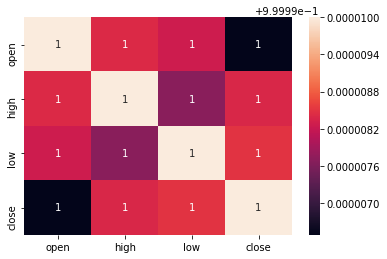

In [21]:
sns.heatmap(banknifty.corr(),annot=True)

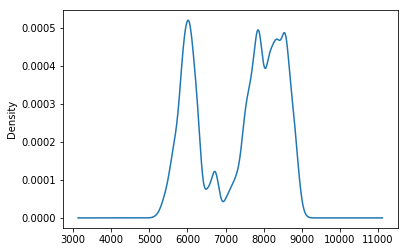

In [22]:
nifty50['high'].plot('kde')

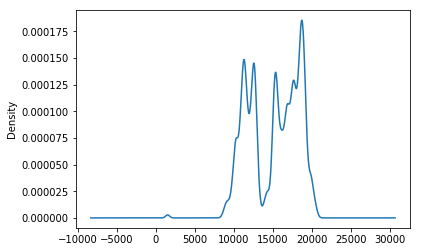

In [23]:
banknifty['high'].plot('kde')

In [24]:
import quandl
import pandas as pd
import numpy as np
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm

C:\Users\SANJAY\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Bank nifty prediction

In [25]:
banknifty.head()

,date,time,open,high,low,close
0,2012-12-03,2018-12-11 09:16:00,12125.70,12161.70,12125.70,12160.95
1,2012-12-03,2018-12-11 09:17:00,12161.75,12164.80,12130.40,12130.40
2,2012-12-03,2018-12-11 09:18:00,12126.85,12156.10,12126.85,12156.10
3,2012-12-03,2018-12-11 09:19:00,12157.25,12164.75,12151.60,12164.20
4,2012-12-03,2018-12-11 09:20:00,12162.80,12162.80,12148.20,12151.15


In [26]:
banknifty = banknifty[['close']]

### Task: predicting 30 days into future

In [27]:
forecast_out = int(30) 
banknifty['Prediction'] = banknifty[['close']].shift(-forecast_out) #  label column with data shifted 30 units up

In [28]:
X = np.array(banknifty.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [29]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

In [30]:
y = np.array(banknifty['Prediction'])
y = y[:-forecast_out]

In [31]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [32]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9900794955421135


In [33]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[19225.61523219 19225.26727414 19215.12678229 19218.25840477
 19219.89877845 19214.38115789 19206.0798729  19206.17928949
 19215.92211498 19224.07427509 19228.34918832 19231.97789374
 19239.28501286 19235.05980793 19238.93705481 19253.75012623
 19264.93449223 19278.6042729  19277.46098216 19272.98723575
 19285.01664275 19284.07218517 19291.13076283 19288.04884864
 19292.96996968 19293.66588579 19292.72142822 19291.27988771
 19289.44068085 19298.48759024]


### Nifty 50 prediction

In [34]:
nifty50.head()

,date,time,open,high,low,close
0,2013-04-01,2018-12-11 09:16:00,5701.15,5704.65,5694.30,5697.00
1,2013-04-01,2018-12-11 09:17:00,5697.05,5698.35,5695.65,5697.50
2,2013-04-01,2018-12-11 09:18:00,5697.90,5697.90,5690.60,5692.15
3,2013-04-01,2018-12-11 09:19:00,5691.65,5694.70,5691.65,5693.90
4,2013-04-01,2018-12-11 09:20:00,5694.40,5695.05,5693.35,5694.55


In [54]:
nifty50 = nifty50[['close']]

#### Task: predicting 30 days into future

In [55]:
forecast_out = int(30) 
nifty50['Prediction'] =nifty50[['close']].shift(-forecast_out) #  label column with data shifted 30 units up

In [61]:
X = np.array(nifty50.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [62]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

In [63]:
y = np.array(nifty50['Prediction'])
y = y[:-forecast_out]

In [64]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [65]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9980310516038006


In [66]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[8612.57132648 8609.92413881 8605.27907364 8602.43209822 8602.43209822
 8600.23443298 8595.8391025  8595.68926169 8599.78491054 8602.18236353
 8602.28225741 8604.08034715 8605.37896752 8604.38002877 8606.52774707
 8607.32689807 8608.12604907 8611.42254693 8613.07079586 8611.57238774
 8613.42042442 8613.07079586 8615.06867335 8614.51925704 8616.6170284
 8617.36623246 8616.11755903 8616.36729372 8615.51819578 8619.81363239]
